Consider the following parameterization of a policy: There is a \preference" for each
action, for each column and for each row. Thus the set of preferences can be denoted by
θx(N; 0); θy(N; 0); θx(S; 0); θy(S; 0); θx(E; 0); θy(E; 0); :::; θx(W; 9); θy(W; 9), for a total of
80 preference values. The total preference for an action a in a state (i, j) is given by
θx(a; i) + θy(a; j). The action probabilities are generated by a soft-max function using
these preferences.
4. Implement a MC policy gradient algorithm. Choose appropriate learning rates, and turn
in two curves for each variant as indicated in the first part as well as the optimal policies
learnt.

In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [2]:
def softmax_action(state, parameters):
    '''
    Returns action and the probability of that action
    '''
    x, y = state
    north = parameters[x,0,0] + parameters[y,1,0]
    east = parameters[x,0,1] + parameters[y,1,1]
    west = parameters[x,0,2] + parameters[y,1,2]
    south = parameters[x,0,3] + parameters[y,1,3]
    
    # The preferences of each action
    preferences = [north, east, west, south]    
    prefs = np.exp(preferences)
    # The probability of selecting each action
    softmax = (prefs)/np.sum(prefs)
    
    action = np.random.choice([0,1,2,3], 1, p=softmax)
#     print(action)
    action = action[0]
    
    return action, softmax[action]

In [3]:
def selected_param_pos(state, action):
    '''
    Returns the row, column, the direction assigned to the parameter
    '''
    direction = action
    row,col = state
    return row, col, direction

In [4]:
def Update(parameters, states, actions, rewards, params_pos, probs, gamma, alpha):
    '''
    Updates the the parameters
    '''
    
    # Initialize return
    G = 0
    
    i=0
    for prob, pos, reward in zip(probs[::-1], params_pos[::-1], rewards[::-1]):
        
        # The positions of parameters that was used to select the action in ith time step
        row, col, direction = pos
        
        # The parameters that were used in action selection
        theta1 = parameters[row, 0, direction]
        theta2 = parameters[col, 1, direction]
                
        # The return 
        G = reward + pow(gamma,i)*G
        
        # The update equations
        theta1 = theta1 + alpha*pow(gamma,i)*(1 - prob)
        theta2 = theta2 + alpha*pow(gamma,i)*(1 - prob)
        
        parameters[row, 0, direction] = theta1
        parameters[col, 1, direction] = theta2
        
        i+=1
        
        return parameters


In [5]:
def plot_MCPG(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('Monte carlo policy gradient avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('Monte carlo policy gradient num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()

In [8]:

def MC_PG(alpha, gamma, episodes):
    '''
    Performs monte carlo policy gradient
    '''
    
    # For each row,direction and For each column,direction one parameter
    parameters = np.ones([12,2,4])
    
    # Set goal postion
    goal_pos = env.set_goal('A')

    # The num steps and avg_reward that we get from each episode is stored
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):
        # An episode
        
        # Store all the states, actions, rewards till the end of episode 
        states = []
        actions = []
        rewards = []
        
        # The parameters that are at each time step
        params_pos = []
        # The probability of picking those parameters
        probs = []
        
        # Reset environment
        curr_state = env.reset()
        
        # Initialize state
#         curr_state = env.get_state()
        
        
        while True:
            # For each step of an episode
            
            # select an action according to softmax probabilities
            curr_action, prob = softmax_action(curr_state, parameters)
#             print(action)

#             print("curr_action = ", curr_action,"curr_state = ",curr_state )

            # Get reward and next state
            next_state, reward = env.step(curr_state, curr_action)
            
            probs.append(prob)
            params_pos.append(selected_param_pos(curr_state, curr_action))
            
            states.append(curr_state)
            actions.append(curr_action)
            rewards.append(reward)

            # Increase the number of steps
            steps[episode] +=1
            
            # Average reward till now
            avg_reward[episode] += reward

            curr_state = next_state
#             curr_action = next_action
#             print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                
                print("Steps =======================", steps[episode])
                print("reward=======================", avg_reward[episode])
                break
        
        # Update the parameters used in action selection in the episode
        parameters = Update(parameters, states, actions, rewards, params_pos, probs, gamma, alpha)
            
    
    return avg_reward, steps, parameters
    

Steps ======================= 66.0
reward======================= -8.0
Steps ======================= 116.0
reward======================= -24.0
Steps ======================= 105.0
reward======================= -37.0
Steps ======================= 59.0
reward======================= 5.0
Steps ======================= 81.0
reward======================= 9.0
Steps ======================= 56.0
reward======================= 1.0
Steps ======================= 33.0
reward======================= 4.0
Steps ======================= 14.0
reward======================= 3.0
Steps ======================= 34.0
reward======================= -11.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 4.0
Steps ======================= 28.0
reward======================= -14.0
Steps ======================= 75.0
reward======================= 8.0
Steps ======================= 60.0
reward======================= -3.0
Steps ================

Steps ======================= 56.0
reward======================= -39.0
Steps ======================= 25.0
reward======================= 0.0
Steps ======================= 54.0
reward======================= -12.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= -3.0
Steps ======================= 63.0
reward======================= 2.0
Steps ======================= 21.0
reward======================= 6.0
Steps ======================= 40.0
reward======================= -2.0
Steps ======================= 37.0
reward======================= 6.0
Steps ======================= 26.0
reward======================= 4.0
Steps ======================= 67.0
reward======================= 0.0
Steps ======================= 37.0
reward======================= 4.0
Steps ======================= 70.0
reward======================= -7.0
Steps ===================

Steps ======================= 50.0
reward======================= 7.0
Steps ======================= 46.0
reward======================= -1.0
Steps ======================= 19.0
reward======================= -5.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= -33.0
Steps ======================= 65.0
reward======================= 7.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 54.0
reward======================= 6.0
Steps ======================= 40.0
reward======================= 1.0
Steps ======================= 49.0
reward======================= -36.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 24.0
reward======================= -1.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ==================

Steps ======================= 85.0
reward======================= -1.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 4.0
Steps ======================= 27.0
reward======================= 6.0
Steps ======================= 53.0
reward======================= 4.0
Steps ======================= 29.0
reward======================= -7.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 2.0
Steps ======================= 35.0
reward======================= 7.0
Steps ======================= 47.0
reward======================= -18.0
Steps ======================= 30.0
reward======================= -7.0
Steps ======================= 25.0
reward======================= -10.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 3.0
Steps ==================

Steps ======================= 27.0
reward======================= -1.0
Steps ======================= 33.0
reward======================= -14.0
Steps ======================= 51.0
reward======================= 8.0
Steps ======================= 36.0
reward======================= 4.0
Steps ======================= 37.0
reward======================= -25.0
Steps ======================= 74.0
reward======================= 7.0
Steps ======================= 29.0
reward======================= -5.0
Steps ======================= 46.0
reward======================= -4.0
Steps ======================= 24.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= -1.0
Steps ======================= 47.0
reward======================= 3.0
Steps ======================= 26.0
reward======================= 0.0
Steps ======================= 66.0
reward======================= 6.0
Steps ======================= 35.0
reward======================= 2.0
Steps ====================

Steps ======================= 45.0
reward======================= 5.0
Steps ======================= 59.0
reward======================= 2.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= -8.0
Steps ======================= 15.0
reward======================= 6.0
Steps ======================= 55.0
reward======================= -16.0
Steps ======================= 15.0
reward======================= 4.0
Steps ======================= 22.0
reward======================= -4.0
Steps ======================= 28.0
reward======================= -10.0
Steps ======================= 35.0
reward======================= 2.0
Steps ======================= 31.0
reward======================= -8.0
Steps ======================= 38.0
reward======================= 3.0
Steps ======================= 46.0
reward======================= -1.0
Steps ======================= 41.0
reward======================= -1.0
Steps ==================

Steps ======================= 49.0
reward======================= -2.0
Steps ======================= 56.0
reward======================= -6.0
Steps ======================= 26.0
reward======================= 2.0
Steps ======================= 46.0
reward======================= -15.0
Steps ======================= 29.0
reward======================= -3.0
Steps ======================= 37.0
reward======================= 5.0
Steps ======================= 35.0
reward======================= -23.0
Steps ======================= 28.0
reward======================= -3.0
Steps ======================= 35.0
reward======================= 1.0
Steps ======================= 53.0
reward======================= 7.0
Steps ======================= 57.0
reward======================= 8.0
Steps ======================= 36.0
reward======================= -17.0
Steps ======================= 20.0
reward======================= 0.0
Steps ======================= 45.0
reward======================= -21.0
Steps ================

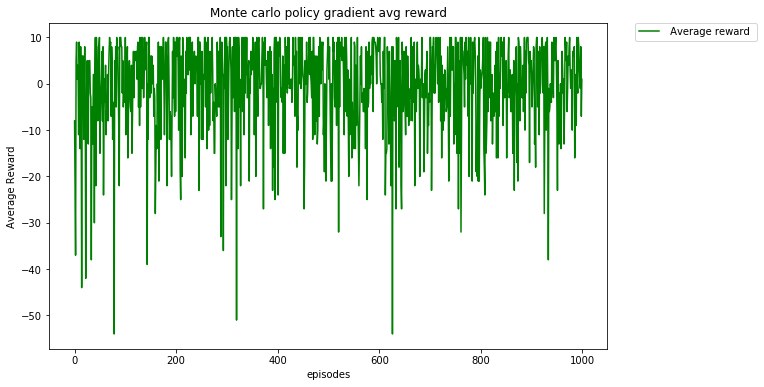

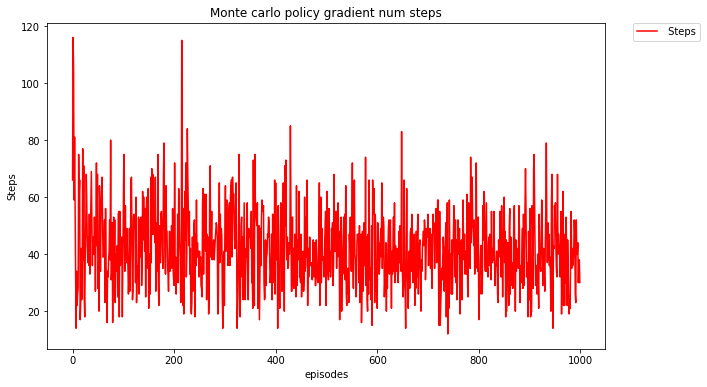

In [9]:
if __name__=='__main__':

    env = gym.make('gym_pdw:pdw-v0')
    
    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
    
    avg_reward, steps, parameters = MC_PG(gamma,alpha, episodes)
    plot_MCPG(avg_reward, steps, episodes)
    

In [ ]:
# To display the policy learn't
# plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()

ax.matshow(np.argmax(parameters, axis=2))
for i in range(12):
    for j in range(12):
        c = int(np.argmax(parameters[i,j,:]))
        direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
        ax.text(i, j, direcs[c], va='center', ha='center')

In [ ]:
z = np.zeros([12,2,4])
np.argmax(z, axis=2)